## SORTS (time)

In [13]:
import math
import random
import time

random.seed(42)

### Insertion sort

In [14]:
def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key

### Selection sort

In [15]:
def selection_sort(A):
    n = len(A)
    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]

### Merge sort

In [16]:
def merge_sort(A):
    if len(A) <= 1:
        return A
    
    mid = len(A) // 2
    left_half = A[:mid]
    right_half = A[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    
    return merge(left_half, right_half)

def merge(left, right):
    merged = []
    left_index, right_index = 0, 0
    
    while left_index < len(left) and right_index < len(right):

        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1
    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1
    
    return merged

### Heap sort

In [17]:
def heapify(A, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and A[l] > A[largest]:
        largest = l

    if r < n and A[r] > A[largest]:
        largest = r

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, n, largest)

def heap_sort(A):
    n = len(A)

    for i in range(n // 2 - 1, -1, -1):
        heapify(A, n, i)

    for i in range(n - 1, 0, -1):
        A[i], A[0] = A[0], A[i]
        heapify(A, i, 0)

### Quick sort

In [18]:
def quicksort(A):
    quickSorter(A,0,len(A)-1)

def partition(A, low, high):
    pivot = A[high]
    i = low - 1
    for j in range(low, high):
        if A[j] <= pivot:
            i = i + 1
            (A[i], A[j]) = (A[j], A[i])
    (A[i + 1], A[high]) = (A[high], A[i + 1])
    return i + 1

def quickSorter(A, low, high):
    if low < high:
        pi = partition(A, low, high)
        quickSorter(A, low, pi - 1)
        quickSorter(A, pi + 1, high)

### Timsort

In [19]:
MINIMUM= 32
  
def find_minrun(n): 
  
    r = 0
    while n >= MINIMUM: 
        r |= n & 1
        n >>= 1
    return n + r 
  
def tim_insertion_sort(array, left, right): 
    for i in range(left+1,right+1):
        element = array[i]
        j = i-1
        while element<array[j] and j>=left :
            array[j+1] = array[j]
            j -= 1
        array[j+1] = element
    return array
              
def tim_merge(array, l, m, r): 
  
    array_length1= m - l + 1
    array_length2 = r - m 
    left = []
    right = []
    for i in range(0, array_length1): 
        left.append(array[l + i]) 
    for i in range(0, array_length2): 
        right.append(array[m + 1 + i]) 
  
    i=0
    j=0
    k=l
   
    while j < array_length2 and  i < array_length1: 
        if left[i] <= right[j]: 
            array[k] = left[i] 
            i += 1
  
        else: 
            array[k] = right[j] 
            j += 1
  
        k += 1
  
    while i < array_length1: 
        array[k] = left[i] 
        k += 1
        i += 1
  
    while j < array_length2: 
        array[k] = right[j] 
        k += 1
        j += 1
  
def tim_sort(array): 
    n = len(array) 
    minrun = find_minrun(n) 
  
    for start in range(0, n, minrun): 
        end = min(start + minrun - 1, n - 1) 
        tim_insertion_sort(array, start, end) 
   
    size = minrun 
    while size < n: 
  
        for left in range(0, n, 2 * size): 
  
            mid = min(n - 1, left + size - 1) 
            right = min((left + 2 * size - 1), (n - 1)) 
            tim_merge(array, left, mid, right) 
  
        size = 2 * size

### Introsort

In [20]:
def introsort(A):
    maxdepth = (len(A).bit_length() - 1) * 2
    introsort_helper(A, 0, len(A), maxdepth)
 
def introsort_helper(A, start, end, maxdepth):
    if end - start <= 1:
        return
    elif maxdepth == 0:
        heapsort(A, start, end)
    else:
        p = partition(A, start, end)
        introsort_helper(A, start, p + 1, maxdepth - 1)
        introsort_helper(A, p + 1, end, maxdepth - 1)
 
        if maxdepth > 0:
            if p - start < 16:
                intro_insertion_sort(A, start, p)
            if end - (p + 1) < 16:
                intro_insertion_sort(A, p + 1, end)
 
def partition(A, start, end):
    pivot = A[start]
    i = start - 1
    j = end
 
    while True:
        i = i + 1
        while A[i] < pivot:
            i = i + 1
        j = j - 1
        while A[j] > pivot:
            j = j - 1
 
        if i >= j:
            return j
 
        swap(A, i, j)
 
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]
 
def heapsort(A, start, end):
    build_max_heap(A, start, end)
    for i in range(end - 1, start, -1):
        swap(A, start, i)
        max_heapify(A, index=0, start=start, end=i)
 
def build_max_heap(A, start, end):
    def parent(i):
        return (i - 1) // 2
    length = end - start
    index = parent(length - 1)
    while index >= 0:
        max_heapify(A, index, start, end)
        index = index - 1
 
def max_heapify(A, index, start, end):
    def left(i):
        return 2 * i + 1
    def right(i):
        return 2 * i + 2
 
    size = end - start
    l = left(index)
    r = right(index)
    if (l < size and A[start + l] > A[start + index]):
        largest = l
    else:
        largest = index
    if (r < size and A[start + r] > A[start + largest]):
        largest = r
    if largest != index:
        swap(A, start + largest, start + index)
        max_heapify(A, largest, start, end)

def intro_insertion_sort(arr, low, high):
    for i in range(low + 1, high):
        key = arr[i]
        j = i - 1
        while j >= low and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

## PRESORTEDNESS

### Number of Runs
The number of runs, is the number of increasing sequences in an array minus one.

In [21]:
def runs(arr):
    count = 0

    for key in range(1,len(arr)):
        if arr[key] < arr[key-1]:
            count += 1

    return count

arr = [3, 4, 4, 7]
print(runs(arr))

0


### Number of Deletions
minimum number of elements that need to be removed from array to obtain a sorted sequence.

In [22]:
def deletions(arr):
    def ceil_index(sub, val):
        l, r = 0, len(sub)-1
        while l <= r:
            mid = (l + r) // 2
            if sub[mid] >= val:
                r = mid - 1
            else:
                l = mid + 1
        return l
 
    sub = [arr[0]]
    for i in range(1, len(arr)):
        if arr[i] >= sub[-1]:
            sub.append(arr[i])
        else:
            sub[ceil_index(sub, arr[i])] = arr[i]
 
    return len(arr) - len(sub)

arr = [3, 4, 5, 7]
print(deletions(arr))

0


### Number of Inversions
The number of inversion in an array, is the number of pairs j < key such that arr[j] > key.

In [23]:
def inversions(arr):
    count = 0

    for key in range(len(arr)):
        for j in range(key):
            if arr[key] < arr[j]:
                count += 1

    return count

arr = [3, 4, 4, 7]
print(inversions(arr))

0


## Setup and Datasets import/cleaning

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

dataset_directory = './kaggledatasets'
dataset_dfs = {}

# import files in the directory
for file_name in os.listdir(dataset_directory):
    try:
        dataset_name = os.path.splitext(file_name)[0]
        dataset_dfs[dataset_name] = pd.read_csv(os.path.join(dataset_directory, file_name))
    except pd.errors.ParserError as e:
        print(f"Error reading file '{file_name}': {e}")
        continue

print("amount of dataframes imported:")
print(len(dataset_dfs))

ARRAY_SIZE = 35

for key, df in dataset_dfs.items():
    for column in df.columns:
        if not df[column].apply(lambda x: isinstance(x, (int, float))).all() or len(df[column].values) < ARRAY_SIZE:
            df.drop(column, axis=1, inplace=True)
            
    dataset_dfs[key] = df.dropna().head(ARRAY_SIZE)


Error reading file 'chord-fingers.csv': Error tokenizing data. C error: Expected 10 fields in line 7, saw 11

amount of dataframes imported:
51


## Sorting and training set creation

In [25]:
results = []
iter = 100

def measure_execution_time(sort_function, arr):
    total_time = 0
    for i in range(iter):
        start = time.perf_counter()
        sort_function(arr.copy())
        end = time.perf_counter()
        total_time += (end - start)
    
    return (total_time * 1000) / iter

for key, df in dataset_dfs.items():
    for column in df.columns:
        arr = df[column].values
        if len(arr) == 0:
            continue
        runs_val = runs(arr)
        inversions_val = inversions(arr)
        deletions_val = deletions(arr)
        time_merge = measure_execution_time(merge_sort, arr.copy())
        time_selection = measure_execution_time(selection_sort, arr.copy())
        time_quick = measure_execution_time(quicksort, arr.copy())
        time_intro = measure_execution_time(introsort, arr.copy())
        time_insertion = measure_execution_time(insertion_sort, arr.copy())
        time_tim = measure_execution_time(tim_sort, arr.copy())
        time_heap = measure_execution_time(heap_sort, arr.copy())
        
        times = {
            'introsort': time_intro,
            'insertion_sort': time_insertion,
            'merge_sort': time_merge,
            'timsort': time_tim,
            'quick_sort': time_quick,
            'selection_sort': time_selection,
            #'heap_sort': time_heap, this is bugged (sometimes outputs 0)
        }

        min_algorithm = min(times, key=times.get)
        min_time = times[min_algorithm]

        results.append({
            'Dataset': key,
            'Column': column,
            'Algorithm': min_algorithm,
            'time': min_time,
            'Runs': runs_val,
            'Inversions': inversions_val,
            'Deletions': deletions_val,
            'introsort': time_intro,
            'insertion_sort': time_insertion,
            'merge_sort': time_merge,
            'timsort': time_tim,
            'heap_sort': time_heap,
            'quick_sort': time_quick,
            'selection_sort': time_selection,

        })

df_results = pd.DataFrame(results)
print(df_results)

                      Dataset            Column       Algorithm      time  \
0               538ratingsMen            Season  insertion_sort  0.009394   
1               538ratingsMen            TeamID      quick_sort  0.034977   
2               538ratingsMen         538rating      quick_sort  0.039780   
3             538ratingsWomen            Season  insertion_sort  0.008893   
4             538ratingsWomen            TeamID      quick_sort  0.037234   
..                        ...               ...             ...       ...   
255                 wines_SPA           acidity         timsort  0.024492   
256                  Youtuber              Rank  insertion_sort  0.009759   
257  yt_sports_channels_stats       video_count         timsort  0.049963   
258  yt_sports_channels_stats        view_count      quick_sort  0.032766   
259  yt_sports_channels_stats  subscriber_count      quick_sort  0.032568   

     Runs  Inversions  Deletions  introsort  insertion_sort  merge_sort  \


## Neural network model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df_results[['Runs',  'Inversions', 'Deletions']]
y = df_results['Algorithm']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

train_indices = X_train.index
test_indices = X_test.index

# indices split
print(train_indices,test_indices)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# neural network model
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for classification
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=300, batch_size=100, verbose=1)

Index([ 33, 138, 147,  35,  11,  29,   0, 170,  88, 179,
       ...
       144, 192,  79, 133, 203, 137, 255,  72, 235,  37],
      dtype='int64', length=208) Index([102, 245, 194, 117, 190, 219,  78, 257, 127, 107,  27, 259,  39,  85,
        62,  90,   4,  51, 123, 186, 223, 140, 116,  44,  38, 249,  34,  12,
        73, 251, 106, 252, 114,  58, 195, 173, 233, 232, 163,  95, 230, 118,
       167, 132,  31,  18, 159, 171, 188,  19, 184, 130],
      dtype='int64')
Epoch 1/300


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0196 - loss: 1.4611  
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4532 - loss: 1.3467 
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 1.2405 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 1.1755 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 1.1244 
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 1.0001 
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.9374 
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.8512 
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.8190 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.7539 
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.7303 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.6403 


## Results

In [27]:
# Make predictions on the test data and compare them to the True best Algorithm
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_algorithms = label_encoder.inverse_transform(y_pred_classes)
true_algorithms = label_encoder.inverse_transform(y_test)

comparison_df = pd.DataFrame({'Predicted Algorithm': predicted_algorithms, 'True Algorithm': true_algorithms})
print(comparison_df)

accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
   Predicted Algorithm  True Algorithm
0           quick_sort      quick_sort
1           quick_sort      quick_sort
2           quick_sort      quick_sort
3           quick_sort      quick_sort
4           quick_sort      quick_sort
5           quick_sort      quick_sort
6           quick_sort      quick_sort
7           quick_sort         timsort
8           merge_sort      quick_sort
9           quick_sort         timsort
10          quick_sort      quick_sort
11          quick_sort      quick_sort
12             timsort         timsort
13          quick_sort      quick_sort
14          quick_sort      quick_sort
15             timsort         timsort
16          quick_sort      quick_sort
17      insertion_sort  insertion_sort
18          quick_sort      quick_sort
19             timsort  insertion_sort
20          quick_sort      quick_sort
21          quick_sort      quick_sort
22          quick_sort      quick_sort
23      insertion_sort  in

### Average time

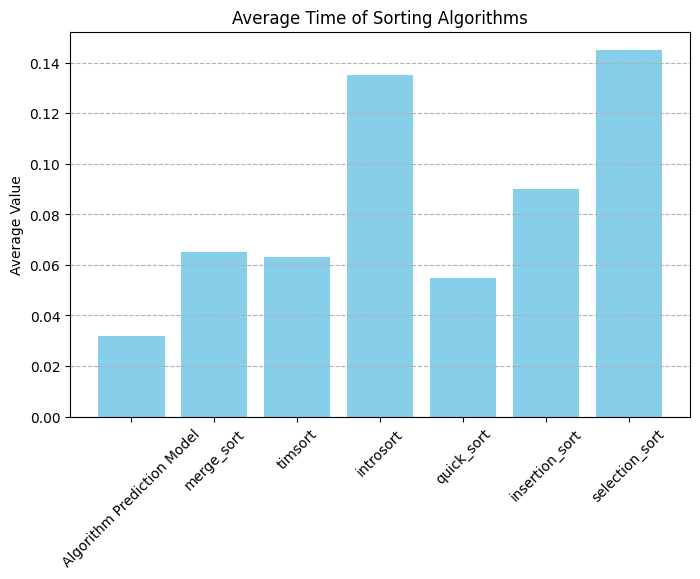

algorithm predicting model:  0.032
merge_sort:  0.065
timsort:  0.063
introsort:  0.135
quick_sort:  0.055
insertion_sort:  0.09
selection_sort:  0.145


In [28]:
test_set_df = df_results.iloc[test_indices]
test_set_df.reset_index(drop=True, inplace=True)

c = []

for index, row in test_set_df.iterrows():
    c.append(row[predicted_algorithms[index]])

def calculate_average(column_name):
    return round(np.sum(test_set_df[column_name]) / len(test_set_df), 3)

algorithm_prediction_model = round(np.sum(c)/len(test_set_df), 3)
merge_sort_avg = calculate_average('merge_sort')
timsort_avg = calculate_average('timsort')
introsort_avg = calculate_average('introsort')
quick_sort_avg = calculate_average('quick_sort')
insertion_sort_avg = calculate_average('insertion_sort')
selection_sort_avg = calculate_average('selection_sort')

data = {
    'Algorithm': ['Algorithm Prediction Model', 'merge_sort', 'timsort', 'introsort', 'quick_sort', 'insertion_sort', 'selection_sort'],
    'Average Value': [algorithm_prediction_model, merge_sort_avg, timsort_avg, introsort_avg, quick_sort_avg, insertion_sort_avg, selection_sort_avg]
}
df_average_comp = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_average_comp['Algorithm'], df_average_comp['Average Value'], color='skyblue')
plt.title('Average Time of Sorting Algorithms')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

print('algorithm predicting model: ', algorithm_prediction_model)
print('merge_sort: ', merge_sort_avg)
print('timsort: ', timsort_avg)
print('introsort: ', introsort_avg)
print('quick_sort: ', quick_sort_avg)
print('insertion_sort: ', insertion_sort_avg)
print('selection_sort: ', selection_sort_avg)

### Model analysis

In [29]:
from itertools import product

# Generate arrays with combinations of values
def generate_arrays(values, n):
    return [list(comb) for comb in product(values, repeat=n)]

possible_values = [100, 25, 10, 5, 0]
X_analysis = generate_arrays(possible_values, 3)

X_analysis_scaled = scaler.fit_transform(X_analysis)

y_preds = model.predict(X_analysis_scaled)
y_preds_classes = np.argmax(y_preds, axis=1)
predicted_algorithm = label_encoder.inverse_transform(y_preds_classes)

print(predicted_algorithm)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
['quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'timsort'
 'quick_sort' 'quick_sort' 'quick_sort' 'timsort' 'timsort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'timsort' 'quick_sort' 'timsort'
 'timsort' 'timsort' 'timsort' 'quick_sort' 'timsort' 'timsort' 'timsort'
 'timsort' 'quick_sort' 'timsort' 'timsort' 'timsort' 'timsort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort' 'quick_sort' 'timsort' 'timsort' 'timsort' 'quick_sort'
 'quick_sort' 'timsort' 'timsort' 'timsort' 'quick_sort' 'timsort'
 'timsort' 'timsort' 'timsort' 'quick_sort' 'quick_sort' 'quick_sort'
 'quick_sort